<a href="https://colab.research.google.com/github/hihunjin/Code-snippet-for-everything/blob/main/draw_contour_and_boxcrop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from PIL import Image
import cv2

In [2]:
e = np.zeros(shape=(150,150), dtype='uint8')
e[2:10, 3:50] = 150
e[2:10, 100:110] = 150

In [3]:
contours, _ = cv2.findContours(
    e,
    cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE
)

In [4]:
print(_)
print()
print(len(contours))
print()
print(contours)

[[[ 1 -1 -1 -1]
  [-1  0 -1 -1]]]

2

[array([[[100,   2]],

       [[100,   9]],

       [[109,   9]],

       [[109,   2]]], dtype=int32), array([[[ 3,  2]],

       [[ 3,  9]],

       [[49,  9]],

       [[49,  2]]], dtype=int32)]


In [5]:
image_with_contour = cv2.drawContours(e,
    contours,
    contourIdx=-1,
    color=[255, 0, 0],
    maxLevel=2
)
# 
# contourIdx
# Parameter indicating a contour to draw. If it is negative, all the contours are drawn.
# 
# maxLevel 
# Maximal level for drawn contours.
# If it is 0, only the specified contour is drawn.
# If it is 1, the function draws the contour(s) and all the nested contours.
# If it is 2, the function draws the contours, all the nested contours, all the nested-to-nested contours, and so on. This
# parameter is only taken into account when there is hierarchy available.

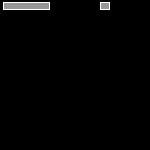

In [6]:
image_with_contour = np.clip(image_with_contour, 0, 256).astype('uint8')
image_with_contour = Image.fromarray(image_with_contour)
display(image_with_contour)

# Crop image with box

* [PIL.Image.Image.crop](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.crop)

In [7]:
import os

for i in range(len(contours)):
    contour = contours[i]
    bottom_left = contour.min(axis=0)[0]
    top_right = contour.max(axis=0)[0]
    cropped_img = Image.fromarray(e).crop(
        (bottom_left[0], bottom_left[1], top_right[0], top_right[1])
    )
    w, h = cropped_img.size
    if w * h < 4:
        continue
    display(cropped_img)